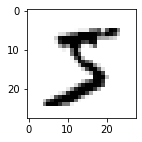

label= 5
(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [1]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
np.random.seed(10)
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

import matplotlib.pyplot as plt
def plot_image(image):             #研究一下
    fig=plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image,cmap='binary')
    plt.show()
    
plot_image(x_train[0])
print("label=",y_train[0])

x_train4d = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test4d = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

x_train4d_normalize = x_train4d/255
x_test4d_normalize = x_test4d/255

print(x_train4d.shape)
print(x_test4d.shape)

# x_train_image[0]

# x_Train_normalize = x_Train/255
# x_Test_normalize = x_Test/255
# x_Train_normalize[0]

# print(y_train_label[:5])

y_train_onehot = np_utils.to_categorical(y_train)
y_test_onehot = np_utils.to_categorical(y_test)

# y_TrainOneHot[:5]

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout, Flatten, Conv2D, MaxPooling2D

In [3]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', input_shape=(28,28,1), activation='relu')) #para: 5*5*16+16

In [4]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [5]:
model.add(Conv2D(filters=36, kernel_size=(5,5), padding='same', activation='relu')) #para: 5*5*16*36+36 

In [6]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [7]:
model.add(Dropout(0.25))

In [8]:
model.add(Flatten())

In [9]:
model.add(Dense(128, activation='relu'))  #para: 1764*128+128

In [10]:
model.add(Dropout(0.5))

In [11]:
model.add(Dense(10,activation='softmax'))  #para: 128*10+10

In [12]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 36)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1764)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history = model.fit(x=x_train4d_normalize, y=y_train_onehot, validation_split=0.2, epochs=10, batch_size=300, verbose=2)

Epoch 1/10
160/160 - 26s - loss: 0.5102 - accuracy: 0.8400 - val_loss: 0.1058 - val_accuracy: 0.9682
Epoch 2/10
160/160 - 26s - loss: 0.1396 - accuracy: 0.9584 - val_loss: 0.0665 - val_accuracy: 0.9795
Epoch 3/10
160/160 - 26s - loss: 0.1008 - accuracy: 0.9704 - val_loss: 0.0510 - val_accuracy: 0.9847
Epoch 4/10
160/160 - 30s - loss: 0.0793 - accuracy: 0.9765 - val_loss: 0.0440 - val_accuracy: 0.9865
Epoch 5/10
160/160 - 32s - loss: 0.0715 - accuracy: 0.9780 - val_loss: 0.0435 - val_accuracy: 0.9869
Epoch 6/10
160/160 - 34s - loss: 0.0607 - accuracy: 0.9817 - val_loss: 0.0383 - val_accuracy: 0.9885
Epoch 7/10
160/160 - 33s - loss: 0.0534 - accuracy: 0.9836 - val_loss: 0.0359 - val_accuracy: 0.9889
Epoch 8/10
160/160 - 33s - loss: 0.0493 - accuracy: 0.9849 - val_loss: 0.0343 - val_accuracy: 0.9900
Epoch 9/10
160/160 - 34s - loss: 0.0431 - accuracy: 0.9866 - val_loss: 0.0326 - val_accuracy: 0.9908
Epoch 10/10
160/160 - 33s - loss: 0.0416 - accuracy: 0.9874 - val_loss: 0.0309 - val_accura

In [14]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train history')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

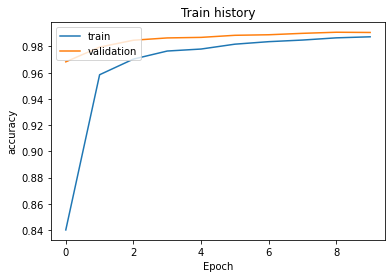

In [15]:
show_train_history(train_history, 'accuracy', 'val_accuracy')

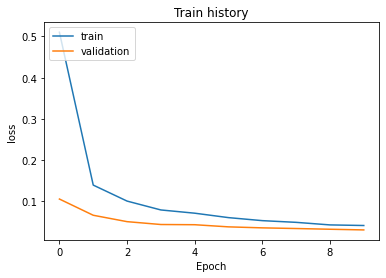

In [16]:
show_train_history(train_history, 'loss', 'val_loss')

In [17]:
scores = model.evaluate(x_test4d_normalize, y_test_onehot)
print()
print('accuracy = ', scores[1])

313/313 [==============================] - 3s 11ms/step - loss: 0.0227 - accuracy: 0.9918

accuracy =  0.9918000102043152


In [18]:
prediction = model.predict_classes(x_test4d_normalize)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [19]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [20]:
import pandas as pd
pd.crosstab(y_test,prediction, rownames=['label'], colnames=['predict'])
#print(y_test_label)
#print(prediction)

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,976,0,0,0,0,0,2,1,1,0
1,0,1132,1,1,0,0,0,0,1,0
2,1,0,1028,0,0,0,0,2,1,0
3,0,0,1,1005,0,1,0,1,2,0
4,0,0,1,0,975,0,1,0,0,5
5,1,0,0,3,0,886,2,0,0,0
6,4,2,0,0,1,2,948,0,1,0
7,0,2,3,3,0,0,0,1016,1,3
8,1,0,2,1,0,1,0,2,964,3


In [21]:
df = pd.DataFrame({'label':y_test, 'predict':prediction})
df[:20]

,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [22]:
df[(df.label!=df.predict)]

,label,predict
247,4,2
445,6,0
582,8,2
619,1,8
684,7,3
...,...,...
9642,9,7
9664,2,7
9692,9,7
9729,5,6


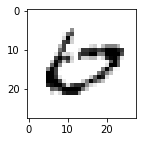

predtion =  0


In [25]:
plot_image(x_test[445])
print('predtion = ', prediction[445])